# Black friday sales analysis

## Statistical analyis

### Descriptive statistical analysis

This dataset comprises of sales transactions captured at a retail store.The dataset has 550,069 rows and 12 columns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns 
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(550068, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

## Gender

In [8]:
print('percentage of gender')
(df['Gender'].value_counts()/df.shape[0])*100

percentage of gender


M    75.310507
F    24.689493
Name: Gender, dtype: float64

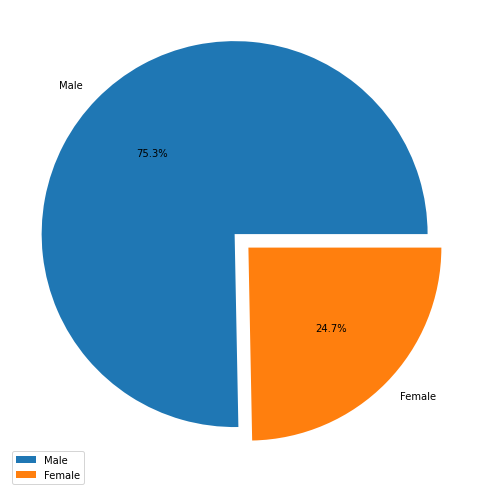

In [9]:
fig1,ax1=plt.subplots(figsize=(12,7))
ax1.pie(df['Gender'].value_counts(),labels=['Male','Female'],explode=(0.1,0),autopct='%1.1f%%')
plt.tight_layout()
plt.legend()
plt.show()

In [10]:
a = df.groupby('Gender')['Purchase'].sum()

In [11]:
values = [a[0],a[1]]

In [12]:
x = ['F','M']

C:\Users\SACHIT\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

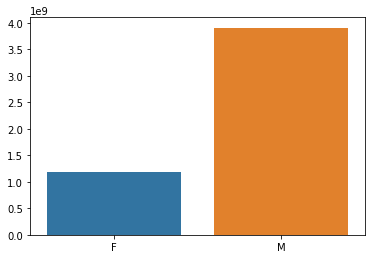

In [13]:
sns.barplot(x,values)

As we can see in the above barplot that men's purchasing power is greater than women,it is mostly due to 75% customers being men

# Age

C:\Users\SACHIT\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

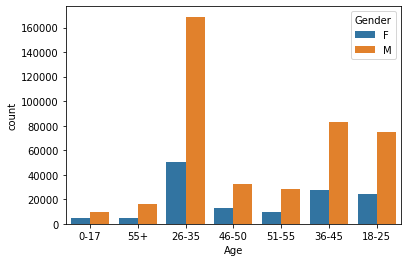

In [14]:
sns.countplot(df['Age'],hue=df['Gender'])

above given plot shows that most of the customers are aged between 26-35 in both the genders

In [15]:
b = df.groupby('Age')['Purchase'].sum()

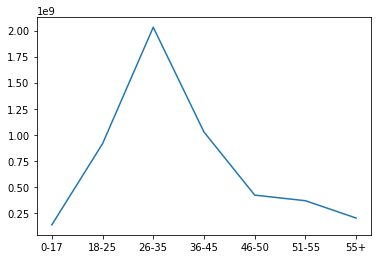

In [16]:
plt.plot(b)

# Product_category

In [17]:
def plot(group,column,plot):
    ax=plt.figure(figsize=(12,6))
    df.groupby(group)[column].sum().sort_values().plot(kind=plot)

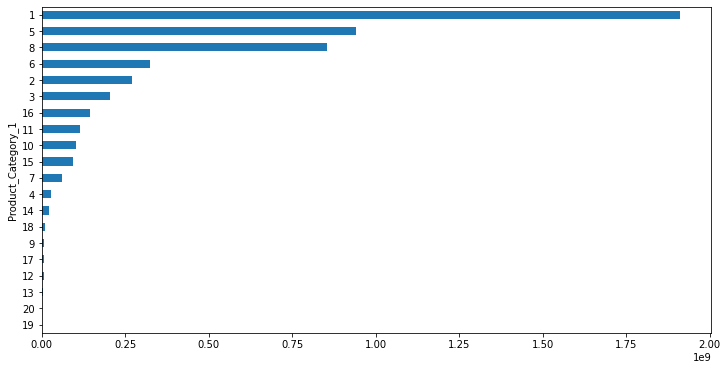

In [18]:
plot('Product_Category_1','Purchase','barh')

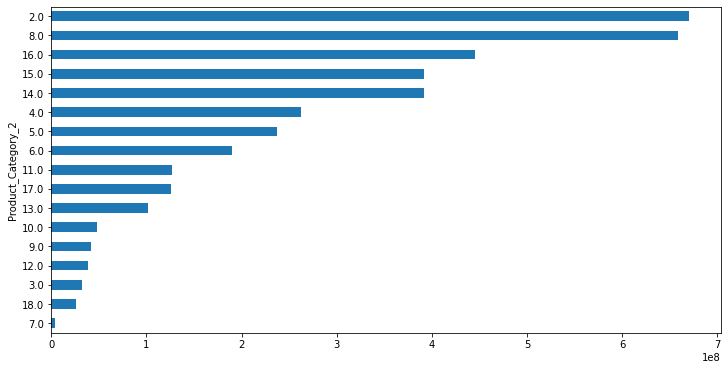

In [19]:
plot('Product_Category_2','Purchase','barh')

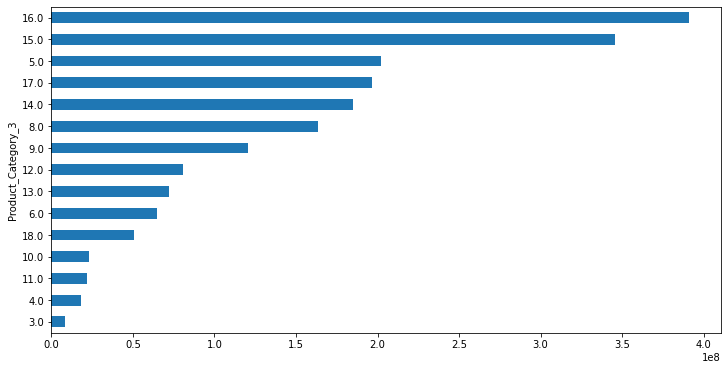

In [20]:
plot('Product_Category_3','Purchase','barh')

# Inferential Analysis

In [21]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

## Questions

1)is mean purchasing power of married people is higher than non married people?                                           

In [22]:
import statsmodels.api as sm

C:\Users\SACHIT\AppData\Roaming\Python\Python39\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [23]:
df.Marital_Status.replace({0:'non_married',1:'married'},inplace=True)

In [24]:
n=df.shape[0]
married=df.Marital_Status.value_counts().loc['married']

In [25]:
df_married = df[df.Marital_Status=='married']
df_non_married = df[df.Marital_Status=='non_married']
df_married.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
6,1000004,P00184942,M,46-50,7,B,2,married,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,married,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,married,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,married,8,NaN,NaN,7871
10,1000005,P00251242,M,26-35,20,A,1,married,5,11.0,NaN,5254


In [26]:
print("\n95% C.I. with statsmodels library ==>",sm.stats.DescrStatsW(df_married['Purchase']).zconfint_mean())


95% C.I. with statsmodels library ==> (9240.460427057078, 9281.888721107669)


In [27]:
z,p_value = sm.stats.ztest(df_married['Purchase'],df_non_married['Purchase'])

print("P-Value is ==> ",p_value)

P-Value is ==>  0.7310946212217337


p_value is more than 0.05 hence there is not  significant difference in mean purchace value

In [28]:
print("\n95% C.I. with statsmodels library ==>",sm.stats.DescrStatsW(df_non_married['Purchase']).zconfint_mean())


95% C.I. with statsmodels library ==> (9248.61641818668, 9283.198819656332)


C:\Users\SACHIT\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


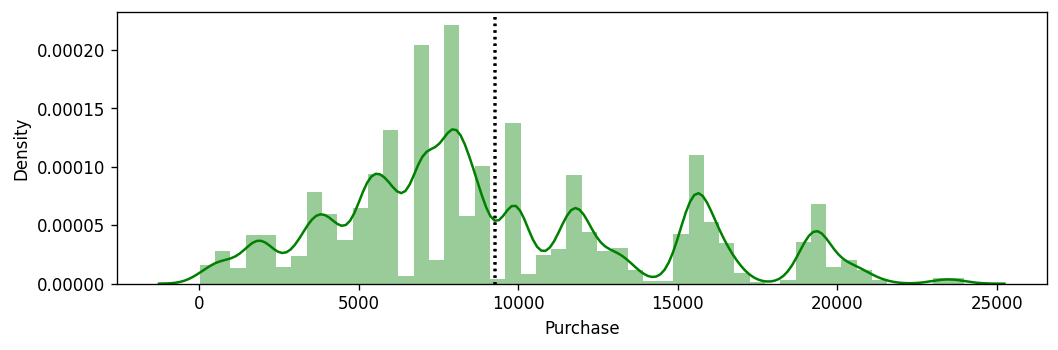

In [29]:
plt.figure(dpi=120,figsize=(10,3))
sns.distplot(df_married['Purchase'],color='green')
plt.axvline(x=9240.460427057078,color = 'black',ls=':')
plt.axvline(x=9281.888721107669,color = 'black',ls=':')

In [30]:
import dabl

Target looks like regression


C:\Users\SACHIT\AppData\Roaming\Python\Python39\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\SACHIT\AppData\Roaming\Python\Python39\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\SACHIT\AppData\Roaming\Python\Python39\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\SACHIT\AppData\Roaming\Python\Python39\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\SACHIT\AppData\Roaming\Python\Python39\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\SACHIT\AppData\Roaming\Python\Python39\site-packages\dabl\plot\utils.py:374:

[array([[<AxesSubplot:title={'center':'F=1.83E+04'}, xlabel='Product_Category_2', ylabel='Purchase'>,
         <AxesSubplot:title={'center':'F=8.27E+01'}, xlabel='Product_Category_3'>,
         <AxesSubplot:title={'center':'F=1.22E+01'}, xlabel='User_ID'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=1.76E+00'}, xlabel='Purchase', ylabel='Product_ID'>,
         <AxesSubplot:title={'center':'F=1.67E+00'}, xlabel='Purchase', ylabel='Gender'>,
         <AxesSubplot:title={'center':'F=8.42E-03'}, xlabel='Purchase', ylabel='Age'>,
         <AxesSubplot:title={'center':'F=5.79E-03'}, xlabel='Purchase', ylabel='Occupation'>],
        [<AxesSubplot:title={'center':'F=5.56E-03'}, xlabel='Purchase', ylabel='City_Category'>,
         <AxesSubplot:title={'center':'F=4.13E-03'}, xlabel='Purchase', ylabel='Stay_In_Current_C...'>,
         <AxesSubplot:title={'center':'F=1.78E-03'}, xlabel='Purchase', ylabel='Marital_Status'>,
         <AxesSubplot:title={'center':'F=5.87E-04'}, x

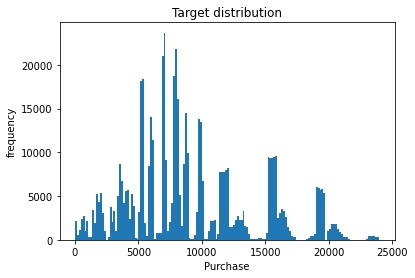

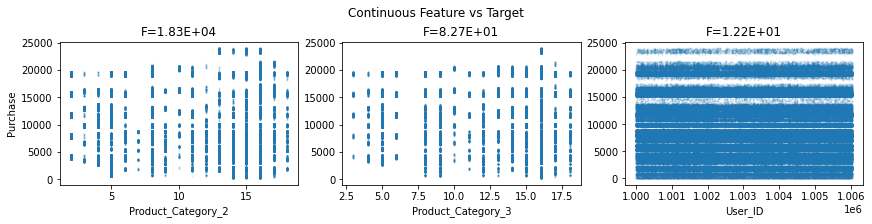

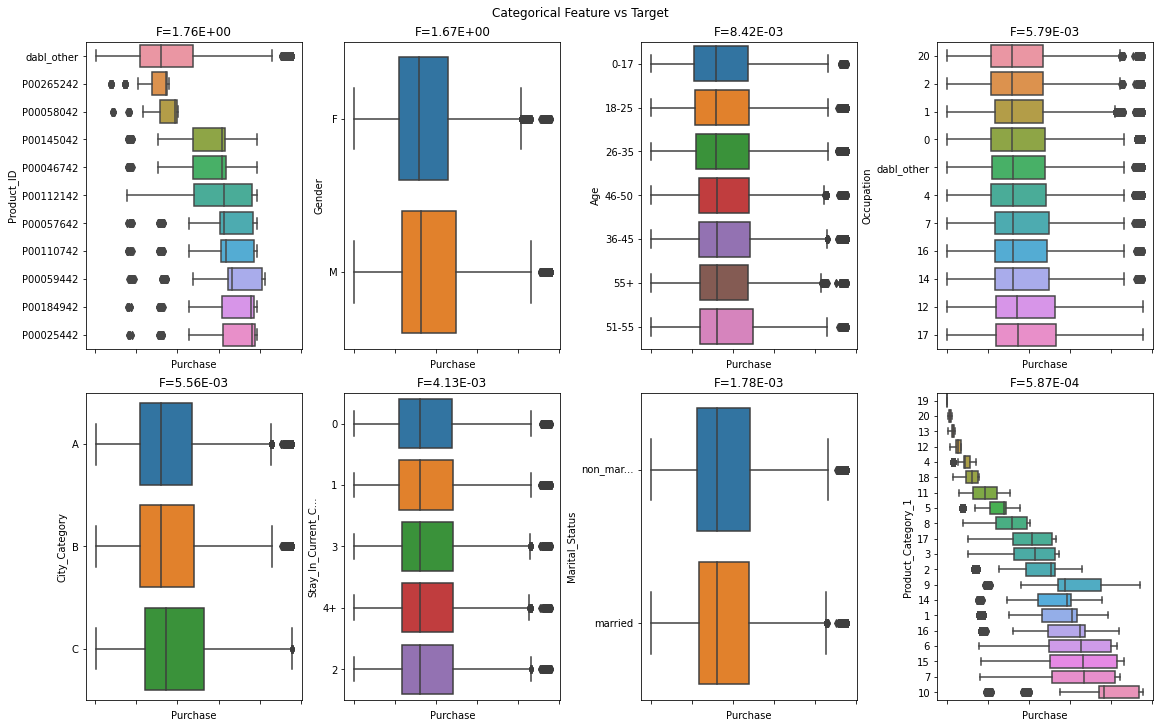

In [31]:
dabl.plot(df, target_col = 'Purchase')

In [32]:
df.sort_values(by=['Purchase'],inplace=True)

C:\Users\SACHIT\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

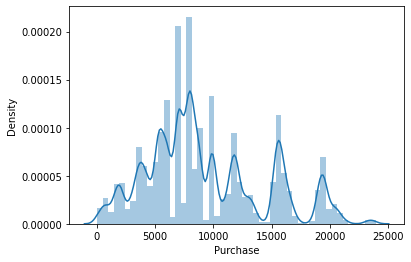

In [33]:
sns.distplot(df['Purchase'],norm_hist=True)

### sampling and confidence interval

In [34]:
import scipy.stats as stats
import math

In [35]:
np.random.seed(10)

# lets take a sample size
sample_size = 2000
sample = np.random.choice(a= df_married['Purchase'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = df_married['Purchase'].std() 
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(df_married['Purchase'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (9235.57378753549, 9604.617212464509)
True mean: 9261.174574082374


In [36]:
df_married.shape

(225337, 12)